**brief summary**
tbd

In [61]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import mannwhitneyu, kruskal
import re
import matplotlib.pyplot as plt

Loading the initial data

In [62]:
df = pd.read_csv("postride.csv")

In [63]:
df.shape

(22, 20)

In [64]:
df.head()

,Timestamp,Name,System,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Please rate your overall experience of riding the autonomous vehicle,It operated as expected,It seems trustworthy,It was comforting,It will drive more safely than other human drivers,It is recommendable to others,How comfortable were you in the autonomous vehicle,How friendly did you feel the autonomous vehicle was?,How safe did you feel in the autonomous vehicle?,How likely are you to ride an autonomous vehicle again?,Feedback #7
0,7/17/18 13:46,Babak,Julie,1,1,1,0,0,0,7,4,3,3,3,4,7,7,5,7,0
1,7/27/18 11:11,Danny,Lily,1,1,1,1,1,1,10,4,4,4,3,4,10,10,5,10,1
2,7/31/18 13:32,Kevin,Julie,1,0,1,1,1,1,6,4,3,2,4,4,5,7,3,7,1
3,8/3/18 11:08,Cortney,Julie,1,0,0,1,1,1,8,4,4,4,4,4,8,9,9,10,1
4,8/3/18 12:37,Michelle,Lily,1,1,1,1,1,1,9,2,4,3,4,4,7,7,5,10,1


remove timestamp and names

In [65]:
df = df[df.columns[2:]]

In [66]:
df.shape

(22, 18)

In [67]:
df.groupby(['System']).size()

System
Julie    11
Lily     11
dtype: int64

## Feedback given during the ride (7 given)

In [100]:
feedback = df[["System", "Feedback #1", "Feedback #2", "Feedback #3", "Feedback #4", "Feedback #5", "Feedback #6", "Feedback #7"]]

In [101]:
feedback.head()

,System,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Feedback #7
0,Julie,1,1,1,0,0,0,0
1,Lily,1,1,1,1,1,1,1
2,Julie,1,0,1,1,1,1,1
3,Julie,1,0,0,1,1,1,1
4,Lily,1,1,1,1,1,1,1


In [102]:
feedback.groupby(['System']).mean()

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Feedback #7
System,,,,,,,
Julie,0.909091,0.636364,0.818182,0.727273,0.545455,0.818182,0.545455
Lily,0.818182,0.454545,0.363636,0.636364,0.545455,0.818182,0.545455


In [103]:
feedback.groupby(['System']).sum()

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Feedback #7
System,,,,,,,
Julie,10,7,9,8,6,9,6
Lily,9,5,4,7,6,9,6


So Julie had the same or higher feedback than did Lily when looking at both sums and means

In [104]:
# feedback_sums = feedback.assign(Sums = feedback[feedback.columns[1:]].aggregate(axis = 1, func = sum))

In [105]:
feedback_sums = feedback.assign(Sums = feedback[feedback.columns[1:]].aggregate(axis = 1, func = sum) / 3)

In [106]:
feedback_sums

,System,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Feedback #7,Sums
0,Julie,1,1,1,0,0,0,0,1.000000
1,Lily,1,1,1,1,1,1,1,2.333333
2,Julie,1,0,1,1,1,1,1,2.000000
3,Julie,1,0,0,1,1,1,1,1.666667
4,Lily,1,1,1,1,1,1,1,2.333333
5,Julie,1,0,1,0,-1,1,1,1.000000
6,Lily,1,0,0,0,0,1,1,1.000000
7,Julie,1,1,1,1,1,1,1,2.333333
8,Lily,0,0,0,0,0,0,0,0.000000
9,Julie,1,1,1,1,1,1,1,2.333333


In [107]:
analysis_column = list(feedback_sums)[-1]
print(analysis_column)
x = feedback_sums[feedback_sums["System"]=="Julie"][analysis_column]
y = feedback_sums[feedback_sums["System"]=="Lily"][analysis_column]

Sums


In [108]:
mannwhitneyu(x, y, alternative = 'two-sided')

MannwhitneyuResult(statistic=71.0, pvalue=0.5043415585143118)

pvalue=0.5043415585143118

In [109]:
x = feedback_sums[feedback_sums["System"]=="Julie"]["Feedback #1"]
y = feedback_sums[feedback_sums["System"]=="Lily"]["Feedback #1"]
print(mannwhitneyu(x, y, alternative = 'two-sided'))

x = feedback_sums[feedback_sums["System"]=="Julie"]["Feedback #2"]
y = feedback_sums[feedback_sums["System"]=="Lily"]["Feedback #2"]
print(mannwhitneyu(x, y, alternative = 'two-sided'))

x = feedback_sums[feedback_sums["System"]=="Julie"]["Feedback #3"]
y = feedback_sums[feedback_sums["System"]=="Lily"]["Feedback #3"]
print(mannwhitneyu(x, y, alternative = 'two-sided'))

x = feedback_sums[feedback_sums["System"]=="Julie"]["Feedback #4"]
y = feedback_sums[feedback_sums["System"]=="Lily"]["Feedback #4"]
print(mannwhitneyu(x, y, alternative = 'two-sided'))

x = feedback_sums[feedback_sums["System"]=="Julie"]["Feedback #5"]
y = feedback_sums[feedback_sums["System"]=="Lily"]["Feedback #5"]
print(mannwhitneyu(x, y, alternative = 'two-sided'))

x = feedback_sums[feedback_sums["System"]=="Julie"]["Feedback #6"]
y = feedback_sums[feedback_sums["System"]=="Lily"]["Feedback #6"]
print(mannwhitneyu(x, y, alternative = 'two-sided'))

x = feedback_sums[feedback_sums["System"]=="Julie"]["Feedback #7"]
y = feedback_sums[feedback_sums["System"]=="Lily"]["Feedback #7"]
print(mannwhitneyu(x, y, alternative = 'two-sided'))

MannwhitneyuResult(statistic=66.0, pvalue=0.5810872693281479)
MannwhitneyuResult(statistic=71.5, pvalue=0.424504972218789)
MannwhitneyuResult(statistic=83.5, pvalue=0.07983871964585261)
MannwhitneyuResult(statistic=66.0, pvalue=0.684332786536565)
MannwhitneyuResult(statistic=63.5, pvalue=0.8493606187801608)
MannwhitneyuResult(statistic=60.5, pvalue=0.9608423763499466)
MannwhitneyuResult(statistic=60.5, pvalue=0.9696637618206472)


MannwhitneyuResult(statistic=66.0, pvalue=0.5810872693281479)

MannwhitneyuResult(statistic=71.5, pvalue=0.424504972218789)

MannwhitneyuResult(statistic=83.5, pvalue=0.07983871964585261)

MannwhitneyuResult(statistic=66.0, pvalue=0.684332786536565)

MannwhitneyuResult(statistic=63.5, pvalue=0.8493606187801608)

MannwhitneyuResult(statistic=60.5, pvalue=0.9608423763499466)

MannwhitneyuResult(statistic=60.5, pvalue=0.9696637618206472)

Combined and individual feedback scores were not statistically significant.

In [77]:
feedback_means = feedback.groupby(['System']).mean()

In [78]:
feedback_means.iloc[0].T

Feedback #1    0.909091
Feedback #2    0.636364
Feedback #3    0.818182
Feedback #4    0.727273
Feedback #5    0.545455
Feedback #6    0.818182
Feedback #7    0.545455
Name: Julie, dtype: float64

In [79]:
feedback_means

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,Feedback #7
System,,,,,,,
Julie,0.909091,0.636364,0.818182,0.727273,0.545455,0.818182,0.545455
Lily,0.818182,0.454545,0.363636,0.636364,0.545455,0.818182,0.545455


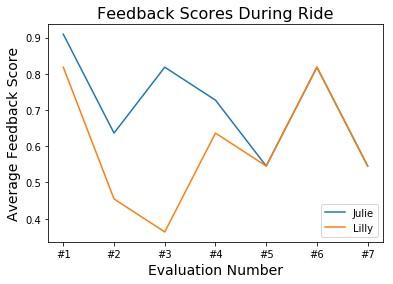

In [99]:
fig, ax = plt.subplots()
julie = feedback_means.iloc[0]
lily = feedback_means.iloc[1]
x = np.arange(7)
#plt = feedback_means.T.plot(figsize = [16,16], grid=True, use_index = True, 
#          title = "Feedback Scores During Ride")
ax.set_xticklabels(('#1', '#1', '#2', '#3', '#4', '#5', '#6', '#7'))
plt.title("Feedback Scores During Ride", fontsize=16)
plt.plot(x, julie, label='Julie')
plt.plot(x, lily, label='Lilly')
plt.xlabel("Evaluation Number", fontsize=14)
plt.ylabel("Average Feedback Score", fontsize=14)
plt.legend(loc='lower right')
plt.savefig("feedback_postride.jpeg", dpi=300, bbox_inches = 'tight', pad_inches = 0)

In [90]:
df[df.columns[1:7]]

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6
0,1,1,1,0,0,0
1,1,1,1,1,1,1
2,1,0,1,1,1,1
3,1,0,0,1,1,1
4,1,1,1,1,1,1
5,1,0,1,0,-1,1
6,1,0,0,0,0,1
7,1,1,1,1,1,1
8,0,0,0,0,0,0
9,1,1,1,1,1,1


## User experience of riding in the autonomous vehicle

We drop all 7 feedback evaluations

In [91]:
ux = df.drop(df.columns[1:7], axis=1)
ux = ux.drop(ux.columns[-1], axis=1)

In [92]:
ux.head()

,System,Please rate your overall experience of riding the autonomous vehicle,It operated as expected,It seems trustworthy,It was comforting,It will drive more safely than other human drivers,It is recommendable to others,How comfortable were you in the autonomous vehicle,How friendly did you feel the autonomous vehicle was?,How safe did you feel in the autonomous vehicle?,How likely are you to ride an autonomous vehicle again?
0,Julie,7,4,3,3,3,4,7,7,5,7
1,Lily,10,4,4,4,3,4,10,10,5,10
2,Julie,6,4,3,2,4,4,5,7,3,7
3,Julie,8,4,4,4,4,4,8,9,9,10
4,Lily,9,2,4,3,4,4,7,7,5,10


In [93]:
ux.shape

(22, 11)